# ロジスティクス回帰 (logistic regression)

線形回帰では、データから最も近い直線を計算し、傾きから相関関係を導くものです。

機械学習では、成否（０または１）を判断するための関数を用い、データから成否の確立を導きます。

０または１をとる関数はいくらもありますが、ロジスティクス回帰ではシグモイド関数（sigmoid function）を用います。

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

シグモイド関数は成否を判断する関数です。

- 𝑧 ≪ 0 → 出力は 0 に近づく（否定的な予測）

- 𝑧 ≫ 0 → 出力は 1 に近づく（肯定的な予測）

- 𝑧 ≈ 0 → 出力は 0.5（判断が分かれる境界）

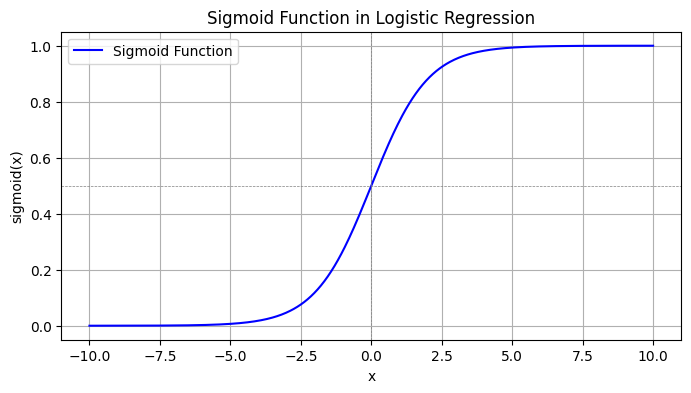

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate input values
x = np.linspace(-10, 10, 500)
y = sigmoid(x)

# Plot the sigmoid curve
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Sigmoid Function', color='blue')
plt.title('Sigmoid Function in Logistic Regression')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


ロジスティックス回帰では、$z$を線形の関数とみて、データから最適な値を計算します。

$$
P(y = 1 \mid x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}}
$$

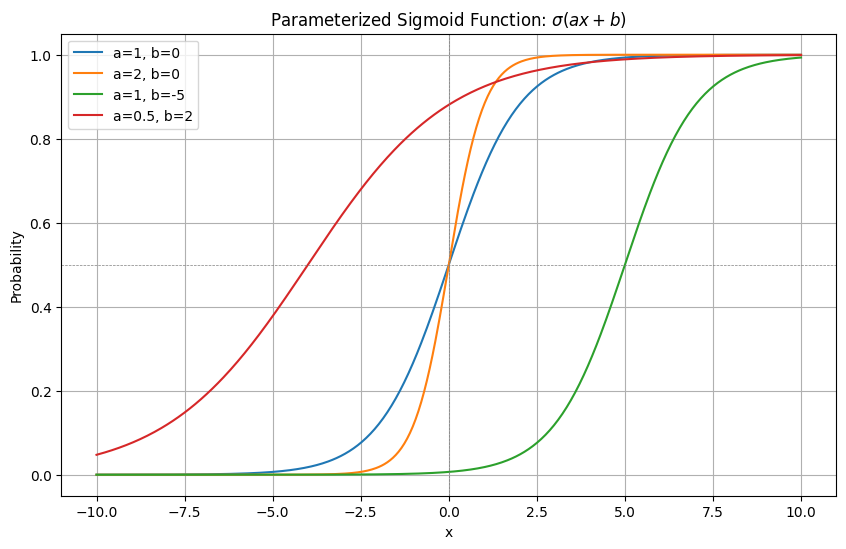

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function with parameters a and b
def sigmoid(x, a=1, b=0):
    return 1 / (1 + np.exp(-(a * x + b)))

# Input range
x = np.linspace(-10, 10, 500)

# Try different parameter values
params = [(1, 0), (2, 0), (1, -5), (0.5, 2)]

plt.figure(figsize=(10, 6))
for a, b in params:
    y = sigmoid(x, a, b)
    label = f'a={a}, b={b}'
    plt.plot(x, y, label=label)

# Plot formatting
plt.title('Parameterized Sigmoid Function: $\\sigma(ax + b)$')
plt.xlabel('x')
plt.ylabel('Probability')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


ここで尤度関数（Likelihood Function）の最も高くなる値を計算します（最尤推定法）。

Maximum Likelihood Estimation（MLE：最尤推定）は、統計モデルのパラメータを推定するための基本かつ強力な手法です。直感的には「観測されたデータが最も起こりやすくなるようなパラメータを選ぶ」ことを意味します。

尤度関数とは全データに対する尤度（正しく予測できる確率）です。

この式は「実際の観測結果が、モデルによってどれだけ説明できるか」を表します。

$$
L(\beta) = \prod_{i=1}^m p^{y^{(i)}} (1 - p)^{1 - y^{(i)}}
$$

入力データ：特徴量 
𝑥(𝑖)

出力データ：ラベル 
𝑦(𝑖)∈{0,1}　

計算を簡単にするため、対数を取ります（対数尤度 Log-Likelihood）。

この式を最大化することで、最適な係数 𝛽 を求めます。

$$
\ell(\beta) = \sum_{i=1}^m \left[ y^{(i)} \log(p^{(i)}) + (1 - y^{(i)}) \log(1 - p^{(i)}) \right]
$$


Estimated parameters: a = 1.50, b = -4.08


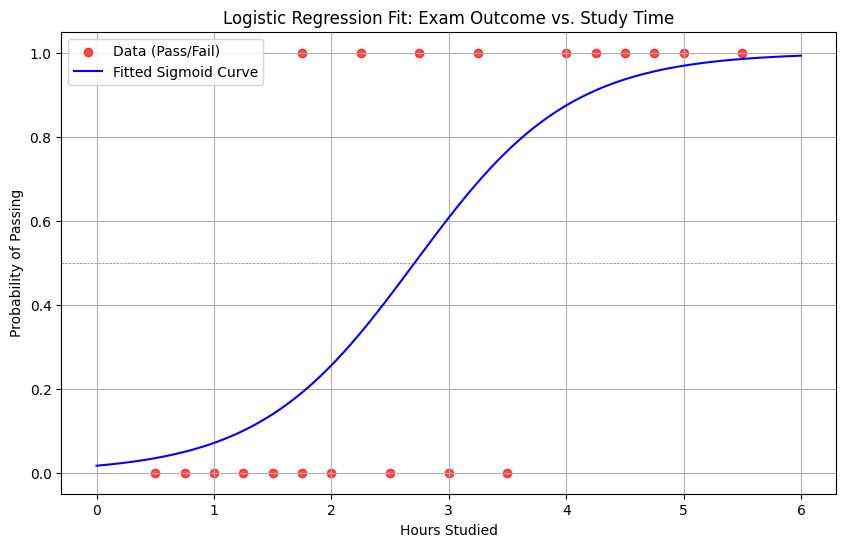

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Sample data: hours studied and pass/fail outcome
X = np.array([0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 1.75, 2.0, 2.25, 2.5,
              2.75, 3.0, 3.25, 3.5, 4.0, 4.25, 4.5, 4.75, 5.0, 5.5])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
              1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Negative log-likelihood loss
def log_likelihood(params, X, y):
    a, b = params
    z = a * X + b
    p = sigmoid(z)
    # Avoid log(0) by clipping
    p = np.clip(p, 1e-10, 1 - 1e-10)
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

# Fit model using MLE
initial_guess = [0, 0]
result = minimize(log_likelihood, initial_guess, args=(X, y), method='BFGS')
a_hat, b_hat = result.x
print(f"Estimated parameters: a = {a_hat:.2f}, b = {b_hat:.2f}")

# Plotting
x_vals = np.linspace(0, 6, 300)
y_vals = sigmoid(a_hat * x_vals + b_hat)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Data (Pass/Fail)', alpha=0.7)
plt.plot(x_vals, y_vals, color='blue', label='Fitted Sigmoid Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression Fit: Exam Outcome vs. Study Time')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()


このモデルは、単純でありながら強力で、医療、マーケティング、社会科学、機械学習など多くの分野で活用されています。線形回帰と異なり、出力が確率であることが最大の特徴であり、分類問題における「判断の根拠」を明示的に提供します。